In [37]:
# 한글 폰트 입력
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [51]:
'''일반인 데이터프레임 불러오기'''

import pandas as pd

ih = pd.read_csv('data/일반인 흡연률.csv', encoding = 'cp949')
ih

,성별(1),특성별(1),특성별(2),2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,성별(1),특성별(1),특성별(2),응답자수 (명),분율 (%),응답자수 (명),분율 (%),응답자수 (명),분율 (%),응답자수 (명),분율 (%),응답자수 (명),분율 (%),응답자수 (명),분율 (%)
1,남자,연령별1,30-39세,405,42.7,416,39.9,423,39.2,338,35.8,284,28.7,294,26.5
2,남자,연령별1,40-49세,496,46.3,475,44.1,483,37.9,419,41.5,435,37.3,348,36.6
3,남자,연령별1,50-59세,541,37.0,500,40.6,477,36.7,481,36.5,422,35.5,395,32.5
4,남자,연령별1,60-69세,469,26.6,499,26.7,487,30.1,483,27.3,480,27.3,489,28.2
5,남자,연령별1,70세이상,462,18.2,464,14.7,486,17.0,508,15.0,535,15.6,483,16.2


In [52]:
'''데이터 전처리'''

# 1. 첫 번째 행 삭제
ih = ih.iloc[1:]

# 2. 컬럼명 정리
ih.columns = ['성별', '특성1', '특성2', '2017_응답자수', '2017_분율',
              '2018_응답자수', '2018_분율', '2019_응답자수', '2019_분율',
              '2020_응답자수', '2020_분율', '2021_응답자수', '2021_분율',
              '2022_응답자수', '2022_분율']

# 3. 응답자수 및 분율 컬럼을 숫자로 변환
numeric_cols = [col for col in ih.columns if '응답자수' in col or '분율' in col]
for col in numeric_cols:
    ih[col] = ih[col].str.replace(',', '')  # 쉼표 제거
    ih[col] = pd.to_numeric(ih[col], errors='coerce')  # 숫자로 변환

# 4. 모든 데이터를 통합 (응답자수 합산 및 분율 가중평균 계산)
total_respondents = 0
weighted_mean_percentages = {}

# 연도별 데이터를 처리
for year in ['2017', '2018', '2019', '2020', '2021', '2022']:
    respondents_col = f'{year}_응답자수'
    percentage_col = f'{year}_분율'
    
    # 응답자수 합산
    total_respondents += ih[respondents_col].sum()
    
    # 분율의 가중평균 계산
    weighted_mean_percentages[year] = (
        (ih[respondents_col] * ih[percentage_col]).sum() / ih[respondents_col].sum()
    )

# 5. 결과 데이터프레임 생성
ih_j = pd.DataFrame({
    '연도': list(weighted_mean_percentages.keys()),
    '응답자수 합산': [ih[f'{year}_응답자수'].sum() for year in weighted_mean_percentages.keys()],
    '분율 가중평균': list(weighted_mean_percentages.values())
})

# 소수점 2자리로 제한
ih_j['분율 가중평균'] = ih_j['분율 가중평균'].round(2)

# 최종 결과 출력
ih_j

,연도,응답자수 합산,분율 가중평균
0,2017,2373,34.20
1,2018,2354,33.13
2,2019,2356,31.97
3,2020,2229,30.44
4,2021,2156,28.20
5,2022,2009,27.37


In [53]:
'''당뇨환자 데이터프레임 불러오기'''

import pandas as pd

dh = pd.read_csv('data/당뇨병 환자 흡연률.csv', encoding = 'cp949')
dh

,시도별(1),2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,시도별(1),응답자수 (명),표준화율 (%),응답자수 (명),표준화율 (%),응답자수 (명),표준화율 (%),응답자수 (명),표준화율 (%),응답자수 (명),표준화율 (%)
1,서울특별시,1142,35.7,1153,31.5,1323,34.6,1071,44.1,1382,35.6
2,부산광역시,782,35.7,854,36.3,934,36.4,828,41.8,1003,33.7
3,대구광역시,404,32.2,400,42.2,448,35.2,437,44.0,533,42.7
4,인천광역시,518,38.6,574,40.0,617,32.9,546,41.9,652,41.1
5,광주광역시,223,31.9,241,36.1,270,34.5,190,38.8,268,36.4
6,대전광역시,192,35.8,241,41.1,271,36.1,221,36.5,277,36.5
7,울산광역시,225,35.8,211,34.6,234,43.6,205,48.1,261,37.8
8,세종특별자치시,51,37.9,30,25.8,38,27.7,43,44.9,56,17.5
9,경기도,2101,34.4,2257,35.6,2561,36.5,2257,42.7,2738,36.4


In [54]:
'''데이터 전처리'''

# 1. 첫 번째 행 삭제
dh = dh.iloc[1:]

# 2. 컬럼명 정리
dh.columns = ['지역', '2020_응답자수', '2020_표준화율', '2021_응답자수', '2021_표준화율',
              '2022_응답자수', '2022_표준화율', '2023_응답자수', '2023_표준화율',
              '2024_응답자수', '2024_표준화율']

# 3. 응답자수 및 표준화율 컬럼을 숫자로 변환
numeric_cols = [col for col in dh.columns if '응답자수' in col or '표준화율' in col]
for col in numeric_cols:
    dh[col] = dh[col].str.replace(',', '')  # 쉼표 제거
    dh[col] = pd.to_numeric(dh[col], errors='coerce')  # 숫자로 변환

# 4. 모든 데이터를 통합 (응답자수 합산 및 표준화율 가중평균 계산)
weighted_mean_percentages = {}

# 연도별 데이터를 처리
for year in ['2020', '2021', '2022', '2023', '2024']:
    respondents_col = f'{year}_응답자수'
    percentage_col = f'{year}_표준화율'
    
    # 분율의 가중평균 계산
    weighted_mean_percentages[year] = (
        (dh[respondents_col] * dh[percentage_col]).sum() / dh[respondents_col].sum()
    )

# 5. 결과 데이터프레임 생성
dh_j = pd.DataFrame({
    '연도': list(weighted_mean_percentages.keys()),
    '응답자수 합산': [dh[f'{year}_응답자수'].sum() for year in weighted_mean_percentages.keys()],
    '분율 가중평균': list(weighted_mean_percentages.values())
})

# 소수점 2자리로 제한
dh_j['분율 가중평균'] = dh_j['분율 가중평균'].round(2)

# 최종 결과 출력
dh_j


,연도,응답자수 합산,분율 가중평균
0,2020,13153,35.56
1,2021,14222,35.96
2,2022,15447,36.56
3,2023,13413,44.56
4,2024,16546,37.45


In [55]:
'''데이터 병합'''

# 'ih_j'와 'dh_j' 병합
idh = pd.merge(ih_j, dh_j, on='연도', suffixes=('_일반인', '_당뇨환자'))

# 결과 출력
idh

,연도,응답자수 합산_일반인,분율 가중평균_일반인,응답자수 합산_당뇨환자,분율 가중평균_당뇨환자
0,2020,2229,30.44,13153,35.56
1,2021,2156,28.20,14222,35.96
2,2022,2009,27.37,15447,36.56


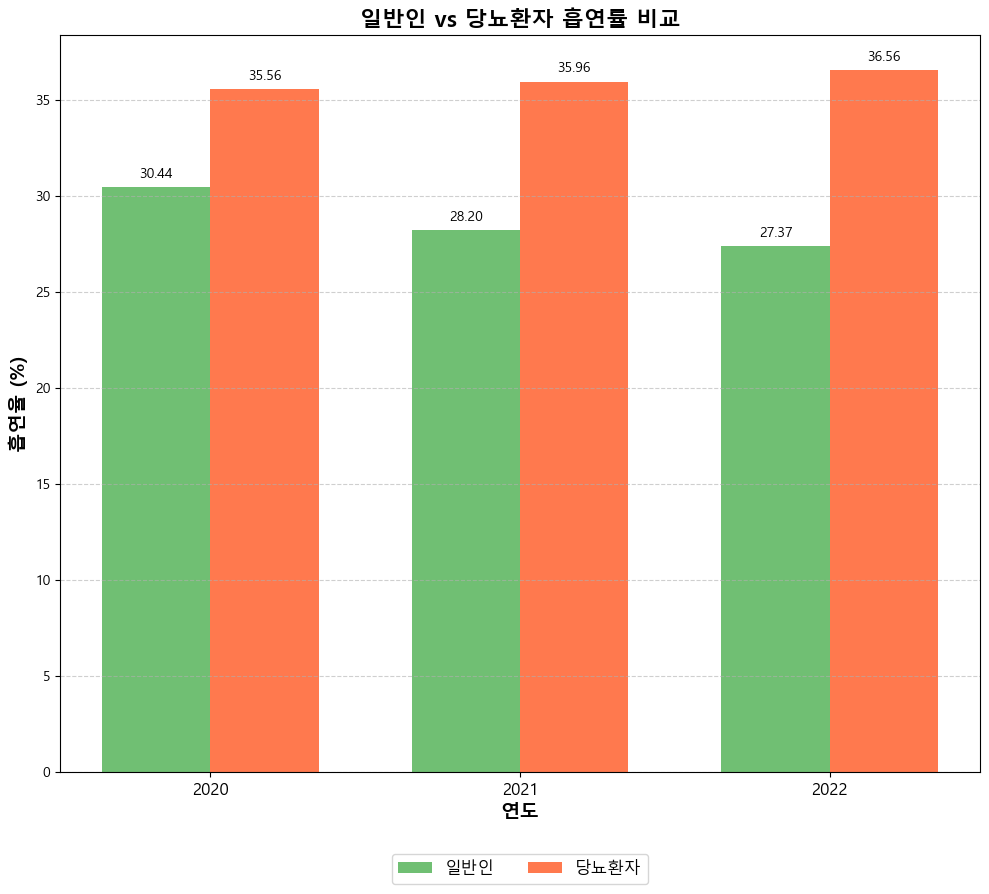

In [75]:
'''시각화'''

# 그래프를 생성하고 저장하는 함수
def save_and_show_bar_graph(idh, filename):
    plt.figure(figsize=(10, 9))
    bar_width = 0.35
    x = range(len(idh['연도']))
    
    # 일반인 흡연률 막대
    bars1 = plt.bar([p - bar_width / 2 for p in x], idh['분율 가중평균_일반인'], 
                    width=bar_width, color='#4CAF50', label='일반인', alpha=0.8)
    # 당뇨환자 흡연률 막대
    bars2 = plt.bar([p + bar_width / 2 for p in x], idh['분율 가중평균_당뇨환자'], 
                    width=bar_width, color='#FF5722', label='당뇨환자', alpha=0.8)
    
    # 각 막대 위에 값 표시
    for bar in bars1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
                 f'{bar.get_height():.2f}', ha='center', fontsize=10, color='black')
    for bar in bars2:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
                 f'{bar.get_height():.2f}', ha='center', fontsize=10, color='black')
    
    # 축, 제목 설정
    plt.xticks(x, idh['연도'], fontsize=12)
    plt.xlabel('연도', fontsize=14, fontweight='bold')
    plt.ylabel('흡연율 (%)', fontsize=14, fontweight='bold')
    plt.title('일반인 vs 당뇨환자 흡연률 비교', fontsize=16, fontweight='bold')
    
    # 범례를 그래프 아래로 이동
    plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
    
    # 그리드 및 레이아웃
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # 그래프 저장
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # 그래프 화면에 출력
    plt.show()

# 함수 실행 (그래프 저장 및 화면 출력)
save_and_show_bar_graph(idh, 'smoking_rate.png')